# NN Cat Classification

In [1]:
import sys
sys.path.append("../src")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# Data Prep

In [2]:
X_train = np.loadtxt("data-cat/x_train.csv")
y_train = np.loadtxt("data-cat/y_train.csv")
X_test = np.loadtxt("data-cat/x_test.csv")
y_test = np.loadtxt("data-cat/y_test.csv")

In [3]:
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


# Binary Neural Net

In [5]:
cat_nn = MultiLayerNN(X = X_train, Y = y_train)

## Hyperparameter Search

Let's focus on learning_rate and L2 regularization parameter lambd for now

In [6]:
num_searches = 20
learning_rate_bounds = [0.00001, 0.001]
lambd_bounds = [0.1, 0.9]
learning_rate_search = np.random.uniform(learning_rate_bounds[0], learning_rate_bounds[1], num_searches)
lambd_search = np.random.uniform(lambd_bounds[0], lambd_bounds[1], num_searches)

Text(0, 0.5, 'L2 Regularization Parameter ($\\lambda$)')

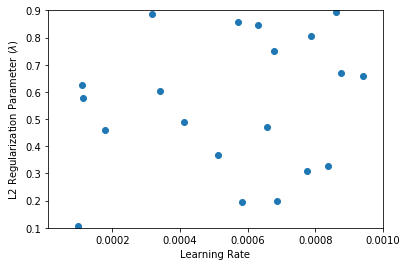

In [7]:
plt.scatter(learning_rate_search, lambd_search)
plt.xlim(learning_rate_bounds)
plt.ylim(lambd_bounds)
plt.xlabel("Learning Rate")
plt.ylabel("L2 Regularization Parameter ($\lambda$)")

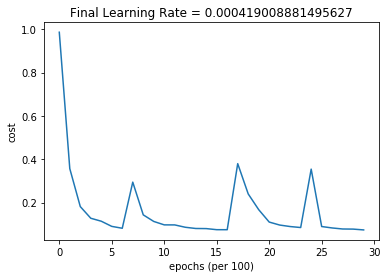

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000001


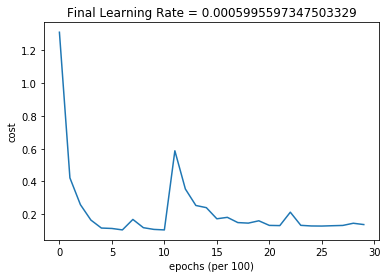

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000002


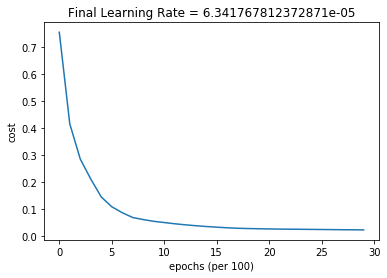

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.74


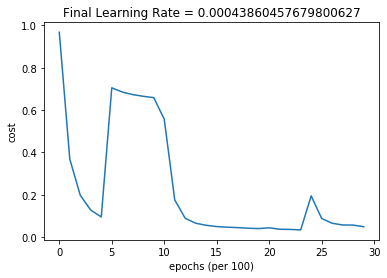

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.6600000000000001


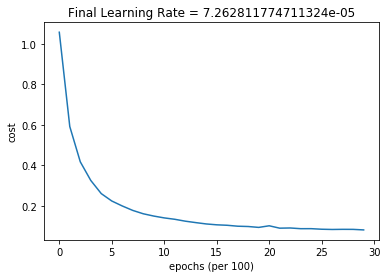

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.76


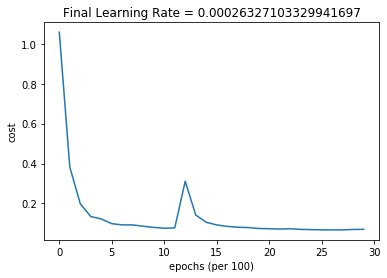

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.72


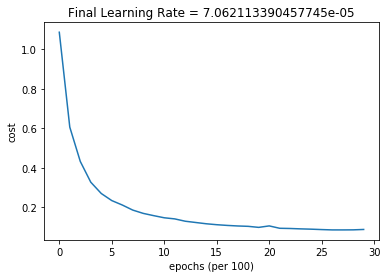

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.76


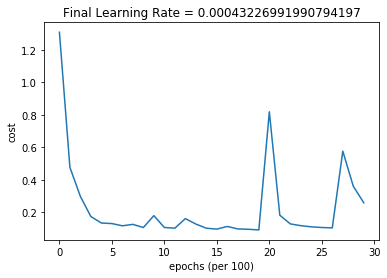

TRAINING:
Accuracy: 0.9952153110047844
TESTING:
Accuracy: 0.7


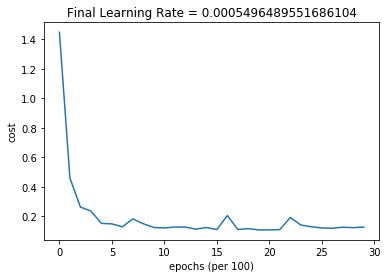

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000001


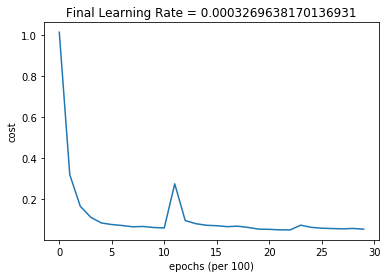

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000001


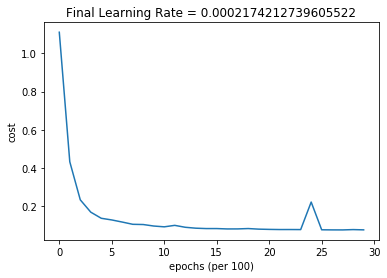

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7200000000000001


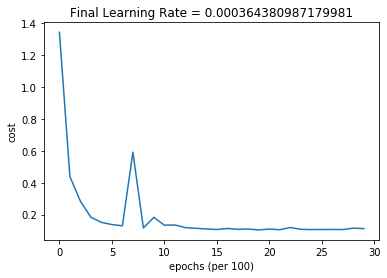

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000001


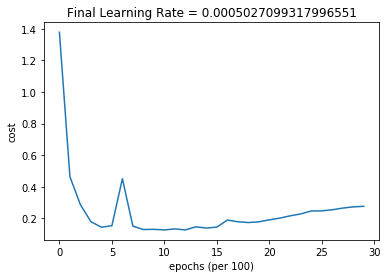

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.76


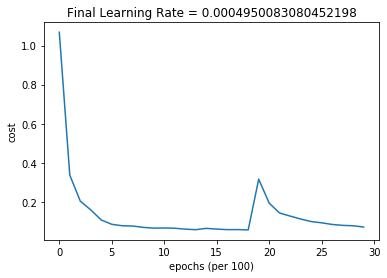

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000001


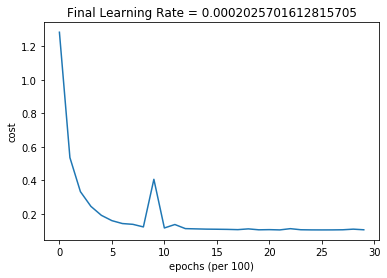

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.68


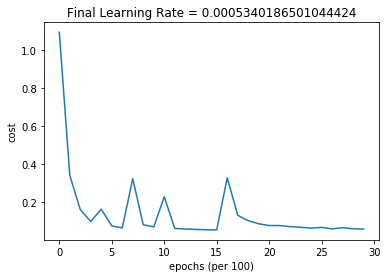

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7000000000000001


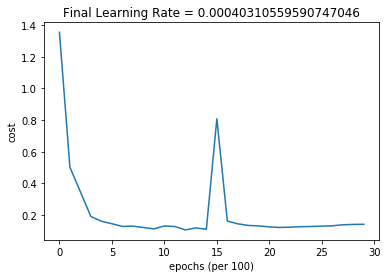

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.72


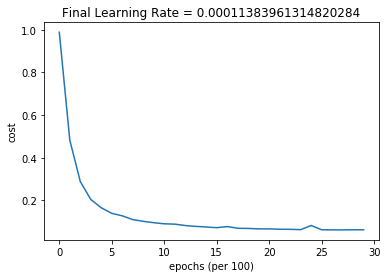

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.72


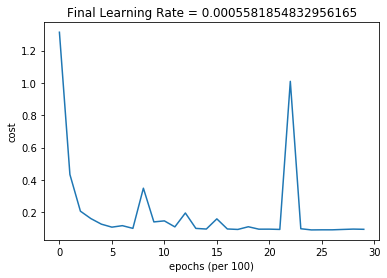

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.72


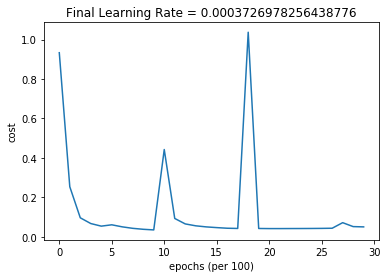

TRAINING:
Accuracy: 0.9999999999999998
TESTING:
Accuracy: 0.7200000000000001


In [8]:
search_list = []

for i in range(num_searches):
    
    search_dict = {}
    search_dict["learning_rate"] = learning_rate_search[i]
    search_dict["lambd"] = lambd_search[i]
    
    cat_nn.fit_binary(layer_dimensions = [X_train.shape[0], 20, 7, 5, 1],
                      learning_rate = learning_rate_search[i],
                      learning_decay_rate = 1e-7,
                      lambd = lambd_search[i],
                      minibatched = True,
                      minibatch_size = 64,
                      optimizer = "adam",
                      num_epochs = 3000,
                      print_cost = False)
    
    print("TRAINING:")
    pred_train, acc_train = cat_nn.predict_binary(X = X_train, y = y_train)
    search_dict["train_accuracy"] = acc_train
    
    print("TESTING:")
    pred_test, acc_test = cat_nn.predict_binary(X = X_test, y = y_test)
    search_dict["test_accuracy"] = acc_test
    
    search_list.append(search_dict)
    


In [9]:
peak_accuracy = np.max(list(x["test_accuracy"] for x in search_list))
opt_learning_rate = 0
opt_lambd = 0
for d in search_list:
    if d["test_accuracy"] == peak_accuracy:
        opt_learning_rate = d["learning_rate"]
        opt_lambd = d["lambd"]
print("Optimal Learning Rate:", opt_learning_rate)
print("Optimal Lambda:", opt_lambd)

Optimal Learning Rate: 0.0007882524106550325
Optimal Lambda: 0.8052646452479443


## Final Run

Cost after epoch 0: 1.377429
Learning rate after epoch 0: 0.000788
Cost after epoch 1000: 0.127663
Learning rate after epoch 1000: 0.000750
Cost after epoch 2000: 0.402286
Learning rate after epoch 2000: 0.000645


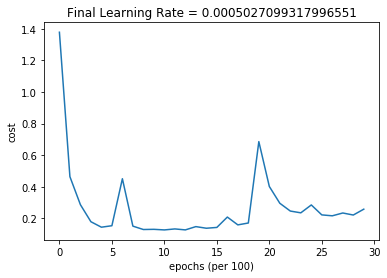

In [10]:
cat_nn.fit_binary(layer_dimensions = [X_train.shape[0], 20, 7, 5, 1],
                  learning_rate = opt_learning_rate,
                  learning_decay_rate = 1e-7,
                  lambd = opt_lambd,
                  minibatched = True,
                  minibatch_size = 64,
                  optimizer = "adam",
                  num_epochs = 3000,
                  print_cost = True)

### Training Set Performance

In [11]:
pred_train, acc_train = cat_nn.predict_binary(X = X_train, y = y_train)

Accuracy: 0.9999999999999998


In [12]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 1.0
Recall: 1.0


In [13]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0]).ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,137,0
label: 1,0,72


### Test Set Performance

In [14]:
pred_test, acc_test = cat_nn.predict_binary(X = X_test, y = y_test)

Accuracy: 0.7200000000000001


In [15]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

Precision: 0.8275862068965517
Recall: 0.7272727272727273


In [16]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0]).ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,12,5
label: 1,9,24
